## Assingment 4

### Tasks:
1. Apply the Scikit Learn SVM Classifier to the Iris dataset using all three categories and all four feature at once
2. You can use the code we ran in class from the scikit learn documentation as your starting point.

I used following different kernels:

    a. SVC with RBF kernel
    b. SVC with Linear Kernel
    c. SVC with polynomial degrees (degrees 2 and 3)
    d. SVC with Sigmoid kernel

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
# read Iris data set
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

In [12]:
# Extracting the relevant columns
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Splitting the data into training and testing sets

In [13]:
# features:
X = iris.drop('species', axis = 1)


y = iris['species']

#split data. We will use 30% training data and 70% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state=20)

### Scaling Data

It is a good practice to scale the data because SVM algorithms are not scale invariant. We also do it in order to avoid attributes in greater numeric ranges. 

In [14]:
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

### Training a model

We will now check the accuracy of the model using different kernels.

In [18]:
models = (svm.SVC(kernel='rbf'),
          svm.SVC(kernel='sigmoid'),
          svm.SVC(kernel='poly', degree=2, gamma='auto'),
          svm.SVC(kernel='poly', degree=3, gamma='auto'),
          svm.SVC(kernel='linear'))

titles = ['rbf',
          'sigmoid',
          'poly (deg.2)',
          'poly (deg.3)',
          'linear']

### Cross-validation

Kernel                                  CV accuracy score   Test accuracy score 

rbf                                       0.933333            0.966667
sigmoid                                   0.950000            0.955556
poly (deg.2)                              0.666667            0.588889
poly (deg.3)                              0.750000            0.611111
linear                                    0.933333            0.966667


([<matplotlib.axis.XTick at 0x270de0186d0>,
 [Text(0, 0, 'rbf'),
  Text(0, 0, 'sigmoid'),
  Text(0, 0, 'poly (deg.2)'),
  Text(0, 0, 'poly (deg.3)'),
  Text(0, 0, 'linear')])

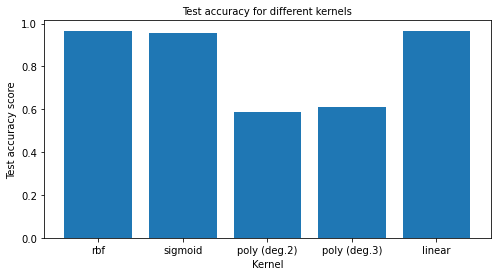

In [20]:
# text format 
bold_start = "\033[1m"
bold_end = "\033[0;0m"

print(bold_start + "{:40}{:20}{:20}".format('Kernel', 'CV accuracy score', 'Test accuracy score') + bold_end+ '\n')   
accuracy = []
for i, model in enumerate(models):
    cv_performance = cross_val_score(model, X_train, y_train,cv=10)
    test_performance = model.fit(X_train, y_train).score(X_test,y_test)
    accuracy.append(test_performance)
    print ("{:40}{:10f}{:20f}".format(titles[i], np.mean(cv_performance),test_performance))
    
#visualize
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Kernel')
ax.set_ylabel('Test accuracy score')
ax.set_title("Test accuracy for different kernels", fontsize ='medium')
y_pos = np.arange(len(titles))
ax.bar(y_pos,accuracy, label='train')
plt.xticks(y_pos, titles)

One thing which we can clearly see from the graph is that polynomial kernel gives the least accurate results.

### Looking for better parameters

We can use the grid-search to search for the best combination of kernels and parameters. The code will test different combinations of Linear and RBF together with gamma and C parameters. A large value of C will give low bias and large variance. Large gamma will give large bias and low variance. Over-fitting will occur with the higher value of gamma.

In [21]:
from sklearn.model_selection import GridSearchCV

learning_algo = svm.SVC(kernel='linear', random_state=101)

search_space = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0, 0.1, 0.01, 0.001, 0.0001]},
                {'kernel': ['sigmoid'], 'C': [1, 10, 100, 1000], 'gamma': [0, 0.1, 0.01, 0.001, 0.0001]},
                {'kernel': ['poly'], 'C': [1, 10, 100, 1000], 'gamma': [0, 0.1, 0.01, 0.001, 0.0001], 'degree':[1,2,3,4,5]}]

gridsearch = GridSearchCV(learning_algo, param_grid=search_space, refit=True, cv=10)
gridsearch.fit(X_train,y_train)
print ('Best parameter: '+ str(gridsearch.best_params_))

cv_performance = gridsearch.best_score_
test_performance = gridsearch.score(X_test, y_test)

print ('Cross-validation accuracy score: %0.3f,'
' test accuracy score: %0.3f'
% (cv_performance,test_performance))

Best parameter: {'C': 10, 'kernel': 'linear'}
Cross-validation accuracy score: 0.950, test accuracy score: 0.967


Hence, Linear kernel works best for this data. RBF gives close accuracy after Linear.

### Let's see if we can improve poly kernel perfomance

In [11]:
learning_algo = svm.SVC(kernel='linear', random_state=101)

search_space = [{'kernel': ['poly'], 'C': [1, 10, 100, 1000], 
                 'gamma': [0, 0.1, 0.01, 0.001, 0.0001], 
                 'degree':[2,3,4,5]}]

gridsearch = GridSearchCV(learning_algo, param_grid=search_space, refit=True, cv=10)
gridsearch.fit(X_train,y_train)
print ('Best parameter: '+ str(gridsearch.best_params_))

cv_performance = gridsearch.best_score_
test_performance = gridsearch.score(X_test, y_test)

print ('\n'+ bold_start+'Cross-validation accuracy score: %0.3f,'
' test accuracy score: %0.3f'
% (cv_performance,test_performance)+bold_end)

Best parameter: {'C': 1000, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}

Cross-validation accuracy score: 0.933, test accuracy score: 0.933


Large value of C will give smaller margin and take more time to train. 

## Summary

Here we analyzed the Iris dataset with different kernels to get the accurate results. 

After scaling the data, training the data, and cross-validation, we came to know that the two most fitting kernels which gave the best accurate results are linear and RBF (accuracy 96.7%). Whereas, Sigmold also gave us the good accuracy of 95.5%. However, polynomial kernels gave the least accurate results of 58.8% for degree 2 and 61.1% for degree 3.

Moving forward, we also used other parameters like C, Gamma, and degree which lead us to better performance. Parameter C = 10 yeilded the same accuarcy for Linear model of 96.7% .We weren't able to improve the already high accuracy.

However, we were able to successfully increase the accuracy for Polynomial kernels from 61.1% to 93.3% of degree 3. We got this result using C = 100 and gamma = 0.1. We used grid-search for the combinations to get the results.